In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb


In [54]:
ir=pd.read_csv("iris_data.csv")
m=ir.drop("species",axis=1)
n=ir['species']
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [55]:
#one hot encoding
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
fea=["sepal_length","sepal_width","petal_length","petal_width"]
oh=OneHotEncoder()
trans=ColumnTransformer([("oh",oh,fea)],remainder="passthrough")
trans_x=trans.fit_transform(m)
trans_x
pd.DataFrame(trans_x)
trans_x.shape
ir.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.2)
model=RandomForestClassifier()
model.fit(m_train,n_train)
model.score(m_test,n_test)
model.predict([[5.1,3.4,1.5,0.2]])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [57]:
m_preds=model.predict(m_test)
n_preds=model.predict(m_test)
n_preds

array(['setosa', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(n_test, n_preds))
confusion_matrix(n_test,n_preds)
accuracy_score(n_test,n_preds)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



0.9666666666666667

In [59]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(m_train,n_train)
    print(f"model accuracy on test set :{clf.score(m_test,n_test)*100:.2f}%")
    print("")
model.predict([[5,3,7,9]])

trying model with 10 estimators...
model accuracy on test set :96.67%

trying model with 20 estimators...
model accuracy on test set :96.67%

trying model with 30 estimators...
model accuracy on test set :96.67%

trying model with 40 estimators...
model accuracy on test set :96.67%

trying model with 50 estimators...
model accuracy on test set :96.67%

trying model with 60 estimators...
model accuracy on test set :96.67%

trying model with 70 estimators...
model accuracy on test set :96.67%

trying model with 80 estimators...
model accuracy on test set :96.67%

trying model with 90 estimators...
model accuracy on test set :96.67%



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [60]:
from sklearn.svm import LinearSVC
np.random.seed(42)
model=LinearSVC()
model.fit(m_train,n_train)
model.score(m_test,n_test)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0

In [61]:
#prediction
model.predict(m_test),np.array(n_test)
n_pred=model.predict(m_test)
np.mean(n_pred==n_test),clf.score(m_test,n_test),accuracy_score(n_test,n_pred)

(1.0, 0.9666666666666667, 1.0)

In [62]:
#predict proba returns probability estimates
clf.predict_proba(m_test[:5]),model.predict(m_test[:5])

(array([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array(['setosa', 'versicolor', 'setosa', 'versicolor', 'setosa'],
       dtype=object))

In [63]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score=cross_val_score(clf,m,n)
print(f"iris cross validated accuracy:{np.mean(cross_val_score)*100:.2f}%")

iris cross validated accuracy:96.00%


In [64]:
# area under the receiver operating characteristic curve(AUUC/ROC)
from sklearn.metrics import roc_curve
n_probs=clf.predict_proba(m_test)
n_probs_positive=n_probs[:,:1]
n_probs_positive[:5],n_probs[:5]

(array([[1.],
        [0.],
        [1.],
        [0.],
        [1.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(n_test,n_preds)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  7]], dtype=int64)

<AxesSubplot:>

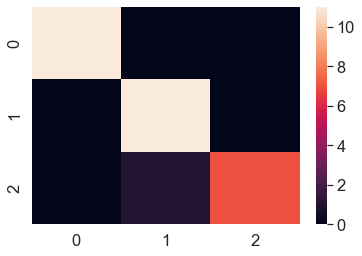

In [ ]:
pd.crosstab(n_test,n_preds,rownames=["actual labels"],colnames=["predicted labels"])
sb.set(font_scale=1.5)
con_mat=confusion_matrix(n_test,n_preds)
sb.heatmap(con_mat)

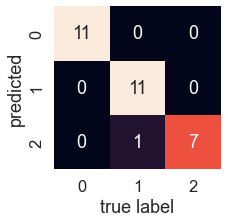

In [ ]:
def plot_con_mat(con_mat):
    fig,ax=pl.subplots(figsize=(3,3))
    ax=sb.heatmap(con_mat,annot=True,cbar=False)
    pl.xlabel("true label")
    pl.ylabel("predicted")
plot_con_mat(con_mat)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


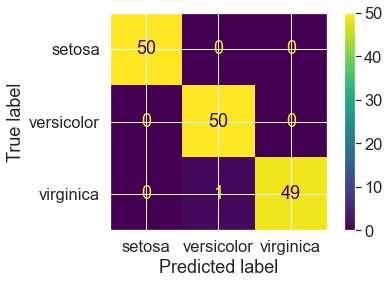

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,m,n) 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(n_test,n_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cv_none=cross_val_score(clf,m,n,scoring=None)
cv_acc=cross_val_score(clf,m,n,scoring="accuracy")
cv_pre=cross_val_score(clf,m,n,cv=5,scoring="precision")
cv_rec=cross_val_score(clf,m,n,cv=5,scoring="recall")
cv_none,cv_acc,cv_pre,cv_rec
cv_pre

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1757, in precision_score
    p

array([nan, nan, nan, nan, nan])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def eval_preds(n_true,n_preds):
    accuracy=accuracy_score(n_true,n_preds)
    precision=precision_score(n_true,n_preds,average='micro')
    recall=recall_score(n_true,n_preds,average='micro')
    f1=f1_score(n_true,n_preds,average='micro')
    metric_dict={
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)
    }
    print(f"Acc:{accuracy *100:.2f}%")
    print(f"precision:{precision:.2f}%")
    print(f"recall:{recall:.2f}%")
    print(f"F1:{f1:.2f}%")
    return metric_dict



In [ ]:
# tuning hyper parameters
from sklearn.model_selection import RandomizedSearchCV
grid={
    "n_estimators":[10,100,150,300,800,1200],
    "max_depth":[None,5,10,20,40],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,3,5]
}
np.random.seed(42)
cl=RandomForestClassifier(n_jobs=1)
rs_cl=RandomizedSearchCV(estimator=cl,
param_distributions=grid,
n_iter=10,
cv=5,
verbose=2)
rs_cl.fit(m_train,n_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 150, 300, 800,
                                                         1200]},
                   verbose=2)

In [ ]:
rs_cl.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [ ]:
rs_n_preds=rs_cl.predict(m_test)
rs_metrics=eval_preds(n_test,rs_n_preds)
grid

Acc:100.00%
precision:1.00%
recall:1.00%
F1:1.00%


{'n_estimators': [10, 100, 150, 300, 800, 1200],
 'max_depth': [None, 5, 10, 20, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 3, 5]}

In [ ]:
grid2={'n_estimators': [100, 150, 300],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1,3]}
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
cl=RandomForestClassifier(n_jobs=1)
gs_cl=GridSearchCV(estimator=cl,
param_grid=grid2,
cv=5,
verbose=2)
gs_cl.fit(m_train,n_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3], 'min_samples_split': [6],
                         'n_estimators': [100, 150, 300]},
             verbose=2)

In [ ]:
gs_cl.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
gs_n_preds=gs_cl.predict(m_test)
gs_metrics=eval_preds(n_test,gs_n_preds)

Acc:100.00%
precision:1.00%
recall:1.00%
F1:1.00%


In [ ]:
#saving model 1
import pickle
pickle.dump(gs_cl,open("grid_search_model_1.pk1","wb"))
loaded_model=pickle.load(open("grid_search_model_1.pk1","rb"))
pickle_n_preds=loaded_model.predict(m_test)
eval_preds(n_test,pickle_n_preds)

Acc:100.00%
precision:1.00%
recall:1.00%
F1:1.00%


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

In [ ]:
#saving model 2
from joblib import dump,load
dump(gs_cl,filename="gs2.joblib")
dumped_model=load(filename="gs2.joblib")
job_n_preds=dumped_model.predict(m_test)
eval_preds(n_test,job_n_preds)

Acc:100.00%
precision:1.00%
recall:1.00%
F1:1.00%


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

!!END